In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: fineG

In [ ]:
pip install diffusers transformers torch


In [ ]:
from diffusers import StableDiffusionPipeline
import torch

# Load the Stable Diffusion model
model_id = "runwayml/stable-diffusion-v1-5"  # You can also use other models like "stabilityai/stable-diffusion-2"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

# Define your text prompt
prompt = "A futuristic city skyline at sunset"

# Generate the image
image = pipe(prompt, num_inference_steps=50).images[0]

# Save the generated image
image.save("generated_image.png")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

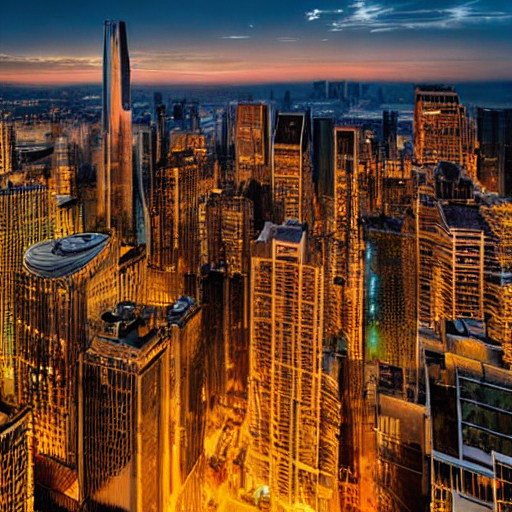

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load an image (make sure the path is correct)
image = cv2.imread('/content/generated_image.png')  # Replace with your image path

# Display the image
cv2_imshow(image)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

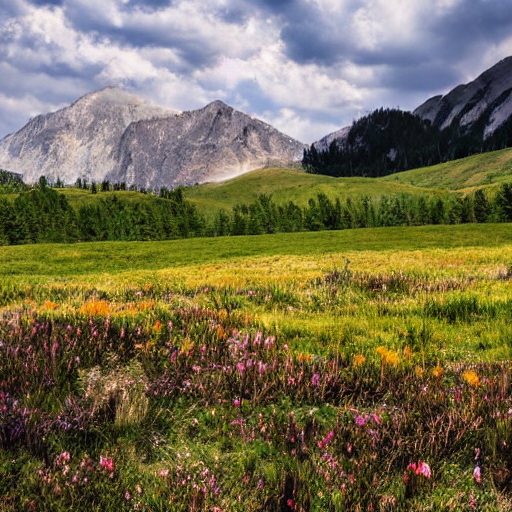

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from diffusers import StableDiffusionPipeline
import torch

def generate_and_display_image(prompt, model_id="runwayml/stable-diffusion-v1-5", num_inference_steps=50):
    """
    Generate an image from a text prompt using Stable Diffusion and display it using OpenCV.

    Parameters:
    prompt (str): The text prompt for image generation.
    model_id (str): The identifier for the Stable Diffusion model.
    num_inference_steps (int): The number of inference steps for image generation.
    """
    # Load the Stable Diffusion model
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

    # Generate the image
    generated_image = pipe(prompt, num_inference_steps=num_inference_steps).images[0]

    # Save the generated image temporarily
    temp_image_path = 'generated_image.png'
    generated_image.save(temp_image_path)

    # Read the generated image using OpenCV
    image = cv2.imread(temp_image_path)

    # Check if the image was loaded successfully
    if image is None:
        print("Error: Unable to load generated image. Please check the file path.")
        return

    # Display the image using OpenCV
    cv2_imshow(image)

# Example usage:
generate_and_display_image("mountains and meadows")
